### 앙상블 모델을 이용해 보기(xgboost, lightgbm)

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

In [131]:
train = pd.read_csv("./bike_data/train.csv", parse_dates=['datetime'])
test = pd.read_csv("./bike_data/test.csv", parse_dates=['datetime'])
sub = pd.read_csv("./bike_data/sampleSubmission.csv")

train.shape, test.shape, sub.shape

((10886, 12), (6493, 9), (6493, 2))

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [133]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [134]:
col_names = [ 'season', 'holiday', 'workingday', 'weather' ]

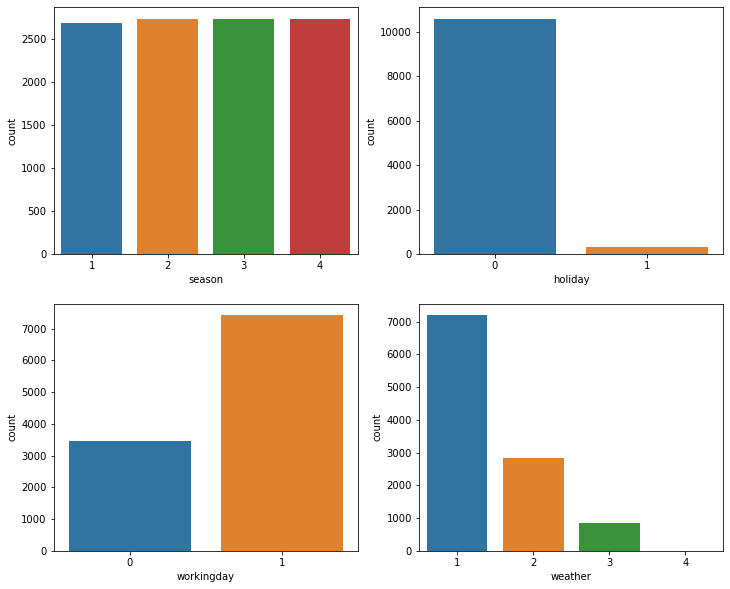

In [135]:
i = 0
plt.figure(figsize=(12,10))

for name in col_names:
    i = i+1
    plt.subplot(2,2,i)
    sns.countplot(x=name, data=train)
    
plt.show()

* holiday는 불균형 데이터이고 weather의 4번 데이터는 거의 드물다.

In [136]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

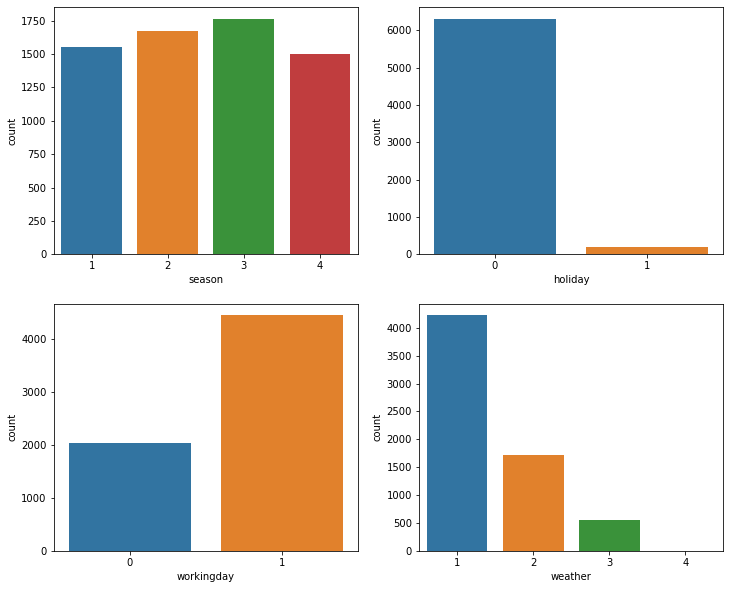

In [137]:
i = 0
plt.figure(figsize=(12,10))

for name in col_names:
    i = i + 1
    plt.subplot(2,2,i)
    sns.countplot(x=name, data=test)

plt.show()

### 수치형 데이터의 시각화

In [138]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

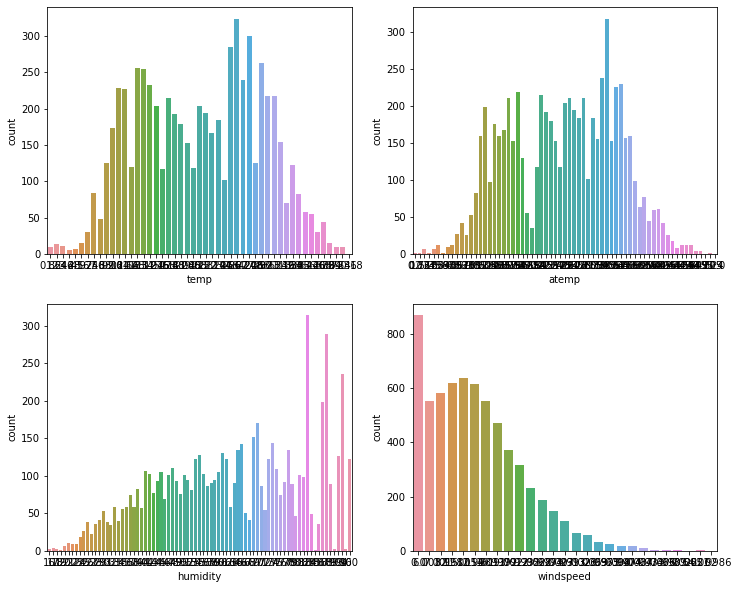

In [139]:
sel = ['temp', 'atemp', 'humidity', 'windspeed']

i = 0
plt.figure(figsize=(12,10))

for name in sel:
    i = i+1
    plt.subplot(2,2,i)
    sns.countplot(x=name, data=test)
    
plt.show()

* windspeed에서 0의 값이 많다.

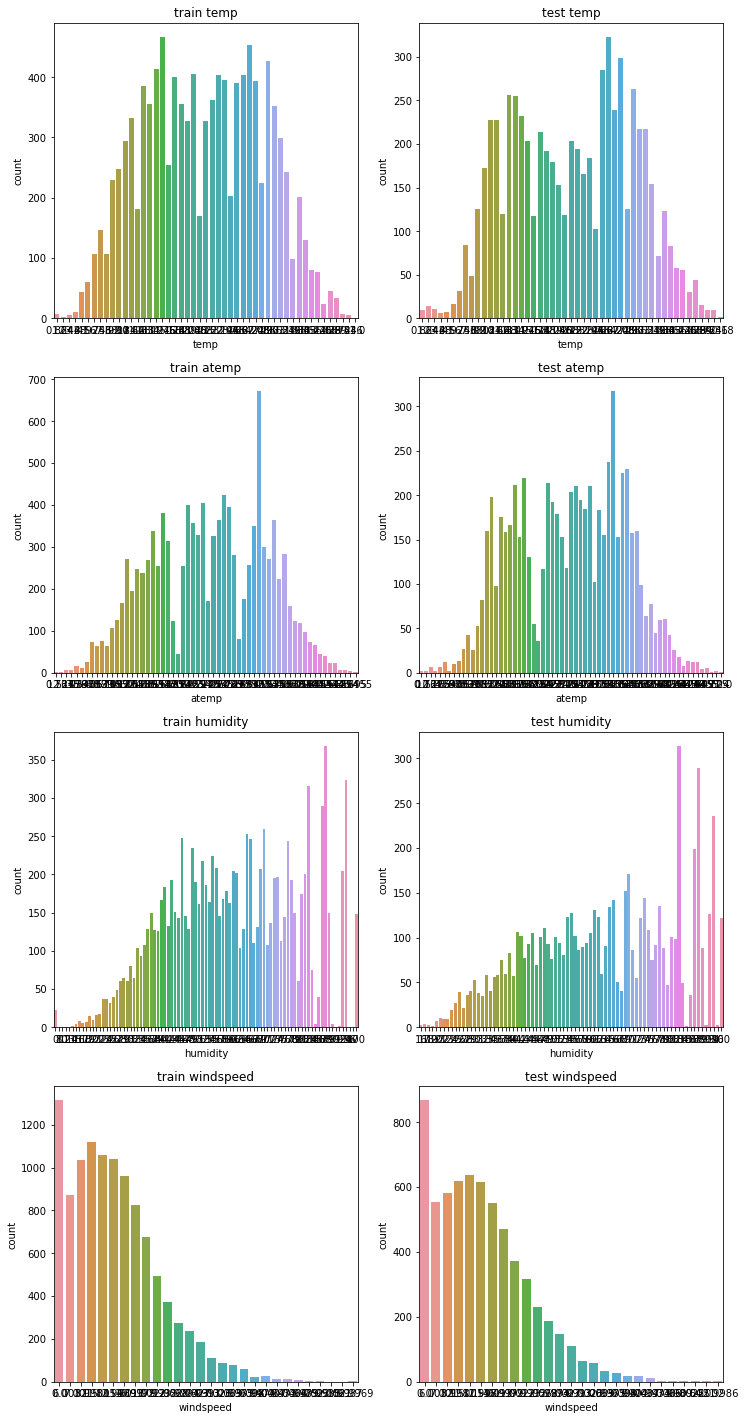

In [140]:
sel = ['temp', 'atemp', 'humidity', 'windspeed']

i = 0
plt.figure(figsize=(12,25))

for name in sel:
    i = i+1
    plt.subplot(4,2,i)
    sns.countplot(x=name, data=train)
    plt.title("train " + name)
    
    i = i+1
    plt.subplot(4,2,i)
    sns.countplot(x=name, data=test)
    plt.title("test " + name)
    
plt.show()

In [141]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [142]:
train['datetime'].min(), train['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [143]:
test['datetime'].min(), test['datetime'].max()

(Timestamp('2011-01-20 00:00:00'), Timestamp('2012-12-31 23:00:00'))

In [144]:
new_tr = train.copy()
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [145]:
new_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [146]:
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second

new_tr

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


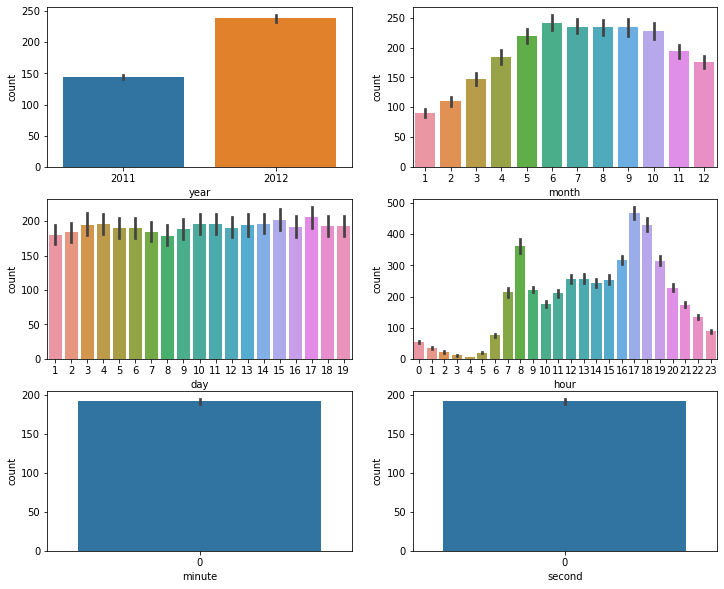

In [147]:
sel = ['year', 'month', 'day', 'hour', 'minute', 'second']

i=0
plt.figure(figsize=(12,10))

for name in sel:
    i = i+1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

* 2011년보다 2012년이 많이 증가대수가 증가했다.
* 겨울에는 대여수가 적고 여름에는 많다.
* 출퇴근 시간대에 빌리는 대수가 많다.
* 분, 초에 대한 데이터는 없다.

In [148]:
new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second

new_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22,0,0


### 기본 모델과 새로운 피처를 추가해서 모델 생성

In [149]:
sel = ['season', 'holiday', 'workingday', 'weather', 'temp',
      'atemp', 'humidity', 'windspeed' ]

In [150]:
X_tr = new_tr[sel]
y = new_tr['count']

X_last_test = new_test[sel]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.2, random_state=77)

In [152]:
model_base = LinearRegression()
model_base.fit(X_train, y_train)

print("학습용 결정계수 :", model_base.score(X_train, y_train))
print("테스트용 결정계수 :", model_base.score(X_test, y_test))

학습용 결정계수 : 0.26323977033626156
테스트용 결정계수 : 0.24990910860376603


In [153]:
### 새로운 feature도 추가(년, 월, 시간)

sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
      'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour' ]

In [154]:
X_tr = new_tr[sel_ex]
y = new_tr['count']

X_last_test = new_test[sel_ex]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.2, random_state=77)

In [156]:
m = LinearRegression()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.39330711638422833
테스트용 결정계수 : 0.370069754983133


### 실제 kaggle에 samplesubmission에 예측값을 넣어 제출해보기

In [157]:
preds = m.predict(X_last_test)
sub['count'] = preds

# count가 0보다 작으면 0으로 만든다.
sub.loc[ sub['count']<0, 'count' ] = 0 # 음수 처리. 그 열의 count를 0으로
sub.to_csv("second_model_lr.csv", index=False)

In [158]:
# 3-6 의사결정트리 모델로 확인해 보기

md = DecisionTreeRegressor()
md.fit(X_train, y_train)

print("학습용 결정계수 :", md.score(X_train, y_train))
print("테스트용 결정계수 :", md.score(X_test, y_test))

학습용 결정계수 : 0.9998961592956268
테스트용 결정계수 : 0.8751847574999251


In [159]:
preds = md.predict(X_last_test)
sub['count'] = preds

# count가 0보다 작으면 0으로 만든다.
sub.loc[ sub['count']<0, 'count' ] = 0 # 음수 처리. 그 열의 count를 0으로
sub.to_csv("second_model_tree.csv", index=False)

In [160]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기

m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9915100346997563
테스트용 결정계수 : 0.9431659267621578


In [161]:
preds = m.predict(X_last_test)
sub['count'] = preds

# count가 0보다 작으면 0으로 만든다.
sub.loc[ sub['count']<0 , "count"  ] = 0
sub.to_csv("4th_model_ensemble.csv", index=False)

### 좀 더 변수를 하나 생성

In [162]:
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [163]:
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

In [164]:
### 새로운 feature도 추가(년, 월, 시간)

sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
      'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek' ]

In [165]:
X_tr = new_tr[sel_ex]
y = new_tr['count']

X_last_test = new_test[sel_ex]

X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.2, random_state=77)

In [166]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기

m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9927802203819613
테스트용 결정계수 : 0.9531439767478418


In [167]:
preds = m.predict(X_last_test)
sub['count'] = preds

# count가 0보다 작으면 0으로 만든다.
sub.loc[ sub['count']<0 , "count"  ] = 0
sub.to_csv("5th_model_ensemble(add01).csv", index=False)

ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

<AxesSubplot:xlabel='hour', ylabel='count'>

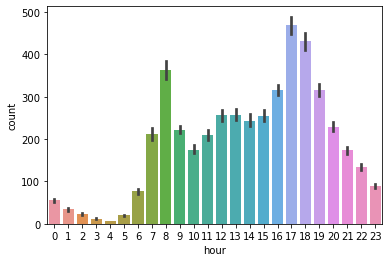

In [168]:
sns.barplot(x='hour', y='count', data=new_tr)

* 출근 : 7,8,9 퇴근 : 17, 18

In [169]:
new_tr.loc[ (new_tr['hour'] == 7)  | 
            (new_tr['hour'] == 8)  | 
            (new_tr['hour'] == 9)  , 'rushhour'] = 1

new_tr.loc[ (new_tr['hour'] != 7)  & 
            (new_tr['hour'] != 8)  &  
            (new_tr['hour'] != 9)  , 'rushhour'] = 0

new_test.loc[ (new_test['hour'] == 7)  | 
            (new_test['hour'] == 8)  | 
            (new_test['hour'] == 9)  , 'rushhour'] = 1

new_test.loc[ (new_test['hour'] != 7)  &  
            (new_test['hour'] != 8)  &  
            (new_test['hour'] != 9)  , 'rushhour'] = 0

In [170]:
new_test['rushhour'].unique()

array([0., 1.])

In [171]:
new_tr['rushhour'] = new_tr['rushhour'].astype(int)
new_tr['rushhour'].unique()

array([0, 1])

In [172]:
new_test['rushhour'] = new_test['rushhour'].astype(int)
new_test['rushhour'].unique()

array([0, 1])

In [173]:
### 새로운 피처도 추가(년, 월, 시간)
sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek', 'rushhour']

In [174]:
X_tr = new_tr[sel_ex]
y = new_tr['count']

X_last_test = new_test[sel_ex]

X_train, X_test, y_train, y_test = train_test_split(X_tr, y, 
                                                   test_size=0.2,
                                                   random_state=77)

In [175]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기
m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9928851608087441
테스트용 결정계수 : 0.9517873691298963


In [176]:
preds = m.predict(X_last_test)
sub['count'] = preds

# count가 0보다 작으면 0으로 만든다.
sub.loc[ sub['count']<0 , "count"  ] = 0
sub.to_csv("6th_model_ensemble(add2).csv", index=False)

### 다항회귀

In [177]:
from sklearn.preprocessing import PolynomialFeatures

In [178]:
### 새로운 피처도 추가(년, 월, 시간)
sel_ex = ['season', 'holiday', 'workingday', 'weather', 'temp',
'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek']

X_tr_all = new_tr[sel_ex]        # 학습용 데이터 변수 선택
X_test_all = new_test[sel_ex]    # 테스트 데이터의 변수 선택 
print(X_tr_all.head())

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  hour  dayofweek  
0  2011      1     0          5  
1  2011      1     1          5  
2  2011      1     2          5  
3  2011      1     3          5  
4  2011      1     4          5  


In [179]:
ex_X_tr = PolynomialFeatures(degree=2,
                            include_bias=False).fit_transform(X_tr_all)

# 제출용
ex_X_test = PolynomialFeatures(degree=2,
                            include_bias=False).fit_transform(X_test_all)

y_tr_all = new_tr['count']

ex_X_tr.shape, ex_X_test.shape, y_tr_all.shape

((10886, 90), (6493, 90), (10886,))

In [180]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기

m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9928521244020425
테스트용 결정계수 : 0.9515275619191893


In [181]:
preds = m.predict(X_last_test)
sub['count'] = preds

# count가 0보다 작으면 0으로 만든다.
sub.loc[ sub['count']<0 , "count"  ] = 0
sub.to_csv("6th_model_ensemble(fea90).csv", index=False)

### 자동 특성 추출

In [182]:
from sklearn.feature_selection import SelectFromModel

In [183]:
select = SelectFromModel(RandomForestRegressor(),
                        threshold="0.1 * median")

select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(), threshold='0.1 * median')

In [184]:
X_train.shape, X_test.shape

((8708, 13), (2178, 13))

In [185]:
X_train_l1 = select.transform(X_train)
X_test_l1 = select.transform(X_test)

X_train_l1.shape, X_test_l1.shape

((8708, 12), (2178, 12))

In [186]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기

m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9924770304199473
테스트용 결정계수 : 0.9523940110559721


#### 1. 새로운 피쳐 만들기 - 년원일시분초
#### 2. 피처 선택 - 년월시 (분초 데이터 없음, 일 tr test 상이)
#### 3. 모델(선형회귀, 의사결정트리, 앙상블)
#### 4. 앙상블 dayofweek 약간 성능 향상 4-1 로그변환(traget)
#### 5. 다항회귀 피처를 대량 생산 성능 향상
#### 6. 피처 중에 모델의 특성 중요도를 이용해서 일부 90% 선택 성능향상

### target 값 변환

In [122]:
### 새로운 feature도 추가(년, 월, 시간)

sel = ['season', 'holiday', 'workingday', 'weather', 'temp',
      'atemp', 'humidity', 'windspeed', 'year', 'month', 'hour', 'dayofweek' ]

<AxesSubplot:xlabel='count', ylabel='Count'>

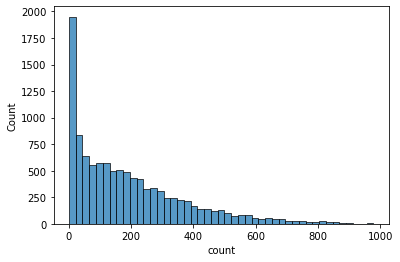

In [123]:
sns.histplot(x='count', data=new_tr)

In [124]:
new_tr['log_count'] = np.log1p(new_tr['count'])

In [125]:
X_tr = new_tr[sel_ex]
y = new_tr['log_count']

X_last_test = new_test[sel_ex]

X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.2, random_state=77)

In [126]:
# 3-7 앙상블(랜덤포레스트) 모델로 확인해 보기

m = RandomForestRegressor()
m.fit(X_train, y_train)

print("학습용 결정계수 :", m.score(X_train, y_train))
print("테스트용 결정계수 :", m.score(X_test, y_test))

학습용 결정계수 : 0.9933763455134171
테스트용 결정계수 : 0.9580276527038242


### 모델 예측

In [127]:
preds = m.predict(X_last_test)
sub['count'] = np.expm1(preds)
sub.to_csv("9th_model_ensemble.csv", index=False)